In [207]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [227]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [228]:
train['date_time'] = pd.to_datetime(train['date_time'])
test['date_time'] = pd.to_datetime(test['date_time'])

In [229]:
train['month'] = pd.DatetimeIndex(train['date_time']).month
test['month'] = pd.DatetimeIndex(test['date_time']).month

In [230]:
train['year'] = pd.DatetimeIndex(train['date_time']).year
test['year'] = pd.DatetimeIndex(test['date_time']).year

In [231]:
train['weekday'] = pd.DatetimeIndex(train['date_time']).weekday
test['weekday'] = pd.DatetimeIndex(test['date_time']).weekday

In [232]:
train['day'] = train['date_time'].dt.day_of_year - 90
test['day'] = test['date_time'].dt.day_of_year - 90

In [244]:
X = train.drop(['low_temp', 'date_time','wind_direction', 'Precipitation_Probability', 'month', 'number_of_rentals'], axis = 1)
y = train.number_of_rentals
test = test[X.columns]

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score

In [246]:
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

In [247]:
lgbm = LGBMRegressor(random_state = 42, learning_rate = 0.1, max_depth = 3)

In [248]:
cv = cross_val_score(lgbm, X, y, scoring = 'neg_mean_absolute_error', cv = kf, n_jobs = -1)

In [249]:
abs(cv.mean())

6810.776228023811

In [256]:
xgb = XGBRegressor(random_state = 42, learning_rate = 0.09, max_depth = 3)

In [257]:
cv = cross_val_score(xgb, X, y, scoring = 'neg_mean_absolute_error', cv = kf, n_jobs = -1)

In [258]:
abs(cv.mean())

6761.9225920993795

In [259]:
rf = RandomForestRegressor(random_state = 42, n_estimators = 70)

In [260]:
cv = cross_val_score(rf, X, y, scoring = 'neg_mean_absolute_error', cv = kf, n_jobs = -1)

In [261]:
abs(cv.mean())

6822.106388648388

In [262]:
rf.fit(X, y)
xgb.fit(X, y)
lgbm.fit(X, y)

LGBMRegressor(max_depth=3, random_state=42)

In [263]:
rf_pred = rf.predict(test)
xgb_pred = xgb.predict(test)
lgbm_pred = lgbm.predict(test)

In [264]:
submission = pd.read_csv('sample_submission.csv')

In [265]:
submission['number_of_rentals'] = (rf_pred + xgb_pred + lgbm_pred) / 3

In [267]:
submission.to_csv('20211104_4th.csv', index = False)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
best = pd.read_csv('20211104_3rd.csv')

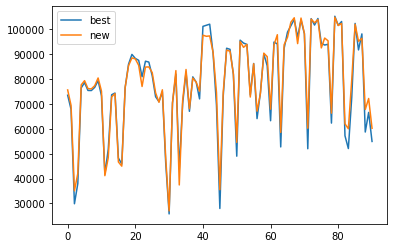

In [268]:
plt.plot(best['number_of_rentals'], label = 'best')
plt.plot(submission['number_of_rentals'], label = 'new')
plt.legend()
plt.show()